In [1]:
import numpy as np
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
meta_activity_map_file = "/data5/deepro/starrseq/papers/results/2_categorize_fragments_on_activity/data/meta_activity_map.csv"

In [4]:
df = pd.read_csv(meta_activity_map_file, usecols=["chrom_coord", "CC", "CC_peak"], index_col="chrom_coord")

/tmp/ipykernel_3577222/870158055.py:17: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


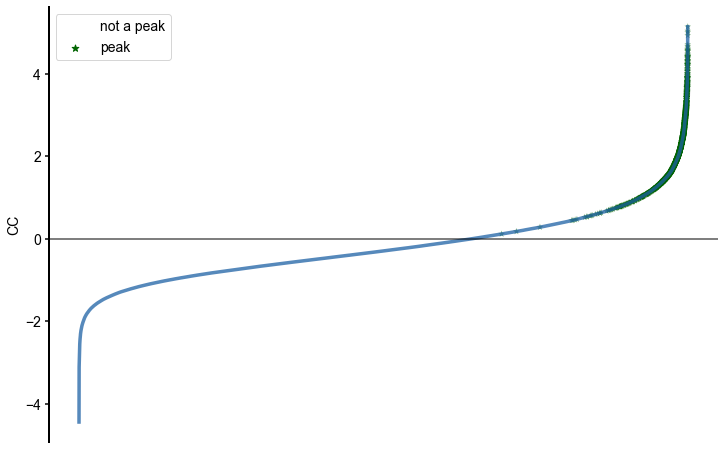

In [5]:
plot_df = df#.iloc[-10000:]

fig,ax = plt.subplots(1,1, figsize=(12,8))
sns.lineplot(data=plot_df, x=plot_df.index, y="CC", ax=ax, linewidth=3.5, alpha=0.75, color="#1e61a5")
# only lib peaks will have size 20 others have size 0.1
peak_list = ["peak" if v==True else "not a peak" for v in (plot_df[f"CC_peak"]==1).values]
sns.scatterplot(
    data=plot_df, x=plot_df.index, y="CC", ax=ax, 
    size=peak_list, sizes={"peak": 50, "not a peak": 0.}, 
    hue=peak_list, hue_order=["not a peak", "peak"], palette={"not a peak": "none", "peak": "darkgreen"},
    style=peak_list, style_order=["not a peak", "peak"], markers={"peak": "*", "not a peak": "."}, 
    legend=True, alpha=0.5, rasterized=True)

# draw a line at 
ax.axhline(0, color ='black', lw = 2, alpha = 0.5)
# Remove Spines
ax.set_xticks([])
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.set_xticklabels("")
ax.set_xlabel("");

In [6]:
save_file = f"../data/figures/activity_map/CC_activity_map.pdf"
pdf = PdfPages(save_file)
pdf.savefig(fig, bbox_inches='tight')
pdf.close()